In [5]:
from faker import Faker

In [6]:
import pandas as pd
import numpy as np

In [8]:
fake = Faker()
Faker.seed(0)

In [9]:
data = {
    'customer_id': [fake.unique.random_int(min=1, max=1000) for _ in range(1000)],
    'age': [fake.random_int(min=18, max=70) for _ in range(1000)],
    'gender': [fake.random_element(elements=('Male', 'Female')) for _ in range(1000)],
    'annual_income': [fake.random_int(min=20000, max=100000) for _ in range(1000)],
    'purchase_frequency': [fake.random_int(min=1, max=20) for _ in range(1000)],
    'average_purchase_value': [fake.random_int(min=10, max=500) for _ in range(1000)],
    'churn': [fake.random_element(elements=(0, 1)) for _ in range(1000)]
}

In [10]:
df = pd.DataFrame(data)
df.head()

,customer_id,age,gender,annual_income,purchase_frequency,average_purchase_value,churn
0,865,42,Male,35203,4,198,0
1,395,63,Male,22208,3,450,0
2,777,21,Female,47137,2,50,0
3,912,40,Male,59052,7,279,1
4,431,39,Male,29779,8,137,0


In [11]:
df

,customer_id,age,gender,annual_income,purchase_frequency,average_purchase_value,churn
0,865,42,Male,35203,4,198,0
1,395,63,Male,22208,3,450,0
2,777,21,Female,47137,2,50,0
3,912,40,Male,59052,7,279,1
4,431,39,Male,29779,8,137,0
...,...,...,...,...,...,...,...
995,220,35,Male,32764,4,383,1
996,684,32,Female,96806,6,458,1
997,962,43,Male,20530,7,99,0
998,345,18,Female,51245,7,258,1


In [12]:
# Check for missing values
print(df.isnull().sum())


customer_id               0
age                       0
gender                    0
annual_income             0
purchase_frequency        0
average_purchase_value    0
churn                     0
dtype: int64


In [13]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)

0


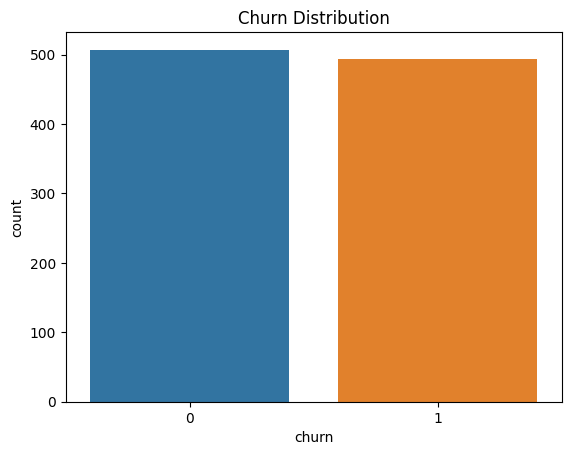

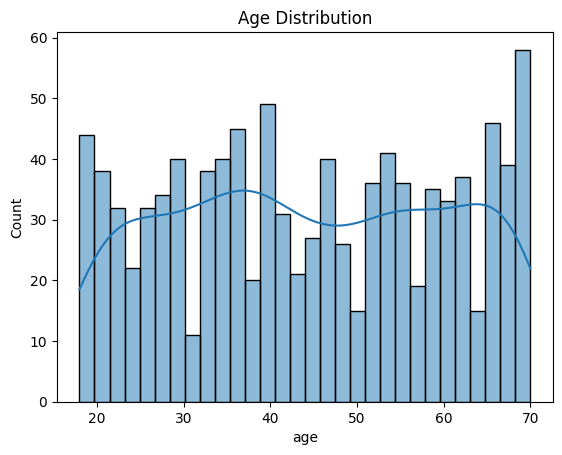

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of churn
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

C:\Users\laksh\AppData\Local\Temp\ipykernel_25564\4046610217.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


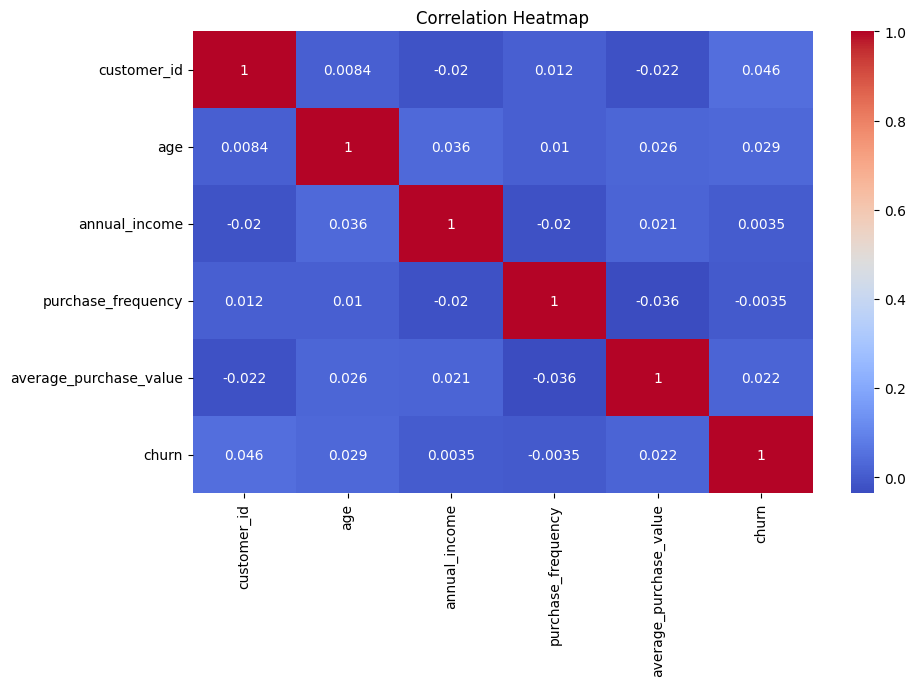

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# Example: Create a new feature for income per purchase
df['income_per_purchase'] = df['annual_income'] / df['purchase_frequency']


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding using scikit-learn
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(df[['gender']])

# Convert the result to a DataFrame for better readability
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['gender']))

# Convert the encoded values to float
gender_encoded_df = gender_encoded_df.astype(float)

print(gender_encoded_df)


     gender_Female  gender_Male
0              0.0          1.0
1              0.0          1.0
2              1.0          0.0
3              0.0          1.0
4              0.0          1.0
..             ...          ...
995            0.0          1.0
996            1.0          0.0
997            0.0          1.0
998            1.0          0.0
999            1.0          0.0

[1000 rows x 2 columns]


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# One-hot encoding for gender column
encoder = OneHotEncoder(sparse=False)
gender_encoded = encoder.fit_transform(df[['gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['gender']))

# Concatenate the encoded gender columns back to the DataFrame
df = pd.concat([df.drop('gender', axis=1), gender_encoded_df], axis=1)

# Split the data into training and testing sets
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.53
Precision: 0.53
Recall: 0.46
F1 Score: 0.49


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# Example: Coefficients of the logistic regression model
coefficients = pd.DataFrame(model.coef_[0], X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
age,0.085176
average_purchase_value,0.057045
gender_Female,0.025818
annual_income,0.022187
gender_Male,-0.025818
purchase_frequency,-0.081863
income_per_purchase,-0.139834
